In [1]:
#필요 라이브러리 불러오기

import os
import cv2
import sys
import matplotlib.pyplot as plt 
import numpy as np 
import xml.etree.ElementTree as Et 
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Model, optimizers
import math 
from sklearn.linear_model import Ridge
from utils import *
from sklearn.preprocessing import LabelBinarizer
from keras import Model
from sklearn.linear_model import SGDClassifier
import pickle
from keras.models import load_model
from keras.preprocessing import image
import pymysql

In [2]:
#이미지 불러온 후 전처리하는 함수
#img_path = 이미지가 있는 라이브러리 경로
#show=False -> 이미지를 보여주지 않아도 돼

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [3]:
def iou(box1, box2):
    """Implement the intersection over union (IoU) between box1 and box2
    Arguments:
    box1 -- first box, list object with coordinates (x1, y1, x2, y2)
    box2 -- second box, list object with coordinates (x1, y1, x2, y2)
    """
    

    # Calculate the (y1, x1, y2, x2) coordinates of the intersection of box1 and box2. Calculate its Area.
    xi1 = max(box1[0], box2[0])
    yi1 = max(box1[1], box2[1])
    xi2 = min(box1[2], box2[2])
    yi2 = min(box1[3], box2[3])
    inter_area = (yi2 - yi1) * (xi2 - xi1)
    
    # calculate the Union area by using Formula: Union(A,B) = A + B - Inter(A,B)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])   
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = abs(box1_area) + abs(box2_area) - inter_area
    
    # compute the IoU
    if(union_area != 0):
        iou = inter_area / union_area
    else:
        iou = 0
        
    if(iou <= 0.49):
        fake_iou1 = inter_area / box1_area
        fake_iou2 = inter_area / box2_area
        
        if(max(fake_iou1, fake_iou2) > 0.8):
            iou = 0.51

    return iou

In [4]:
#def selectivesearch(im, w1, w2, h1, h2):
def selectivesearch(im, w1, w2, w3, w4, w5, w6, h1, h2, h3, h4, h5, h6):
    search_type = 'f'

    if __name__ == '__main__':
        # If image path and f/q is not passed as command
        # line arguments, quit and display help message
        if len(sys.argv) < 3:
            print(__doc__)
            sys.exit(1)

        # speed-up using multithreads
        cv2.setUseOptimized(True);
        cv2.setNumThreads(4);

        # create Selective Search Segmentation Object using default parameters
        ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

        # set input image on which we will run segmentation
        ss.setBaseImage(im)

        # Switch to fast but low recall Selective Search method
        if (search_type == 'f'):
            ss.switchToSelectiveSearchFast()

        # Switch to high recall but slow Selective Search method
        elif (search_type == 'q'):
            ss.switchToSelectiveSearchQuality()
        # if argument is neither f nor q print help message
        else:
            print(__doc__)
            sys.exit(1)

        # run selective search segmentation on input image
        rects = ss.process()
        print('Total Number of Selective Search: {}'.format(len(rects)))

        # number of region proposals to show
        #numShowRects = 100
        numShowRects = len(rects)
        # increment to increase/decrease total number
        # of reason proposals to be shown
        increment = 50

        for i in range(0, 1):
            # create a copy of original image
            imOut = im.copy()

            # itereate over all the region proposals
            for i, rect in enumerate(rects):
                # draw rectangle for region proposal till numShowRects
                if (i < numShowRects):
                    x, y, w, h = rect
                    
#                     if(((x<600 and y>=300) and ((w>w1 and w<w2) and (h>h1 and h<=h2)))
#                        or ((x>600 and y>=300) and ((w>w3 and w<w4) and (h>h3 and h<=h4)))):
#                            cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
#                             rect_list.append([x,y,w,h]) #BIGZONE1

#                     if((((x>=0 and x<=400) and (y>=0 and y<200)) and ((w>w1 and w<w2) and (h>h1 and h<h2))) or
#                        ((x>=0) and (y>=260 and y<=540) and (w>w3 and w<w4) and (h>h3 and h>h4)) or
#                         (y>=600 and (w>w5 and w<w6) and (h>h5 and h<h6))):
#                           cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
#                           rect_list.append([x,y,w,h]) #BIGZONE2


#                     if(
#                         y>=370 and 
#                        ((w>w1 and w<w2) and (h>h1 and h<=h2))
#                        or ((x>800 and y<=400) and (w>w3 and w<w4) and (h>h3 and h<=h4)) or
#                        ((x>=50 and x<=790) and (y>=80 and y<=300) and (w>w5 and w<w6) and (h>h5 and h<=h6))):
#                         cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
#                         rect_list.append([x,y,w,h]) #BIGZONE3
                
                
                    if(
                        y>=125 and 
                       ((w>w1 and w<w2) and (h>h1 and h<=h2))
                       or ((x>267 and y<=135) and (w>w3 and w<w4) and (h>h3 and h<=h4)) or
                       ((x>=18 and x<=265) and (y>=27 and y<=100) and (w>w5 and w<w6) and (h>h5 and h<=h6))):
                        cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
                        rect_list.append([x,y,w,h]) #BIGZONE3, (640,480) 기준


#                     if((w>w1 and w<w2) and (h>h1 and h<=h2)):
#                         cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
#                         rect_list.append([x,y,w,h])
                    
                else:
                    break

    plt.imshow(imOut)

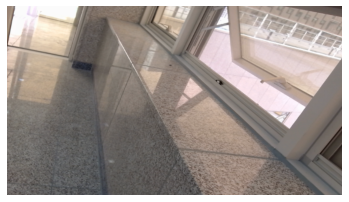

KeyboardInterrupt: 

In [5]:
webcam = cv2.VideoCapture(1)
FULL = 41

while True:
    for i in range(0, 250):
        success,image_ = webcam.read()

#     cv2.imwrite(r'C:\Users\jam56\Desktop\capture\1.jpg', image_)    
    
#     im = cv2.imread(r"C:\Users\Seo\Desktop\capture\1.jpg")
    im = image_
    im = cv2.resize(im, dsize=(1920, 1080), interpolation = cv2.INTER_AREA)
    plt.imshow(im)                           
    plt.axis('off')
    plt.show()
    rect_list = []
#     selectivesearch(im, 30, #zone 1 w minimum
#                    100, #zone 1 w maximum
#                     60, #zone 2 w minimum
#                    210, #zone 2 w maximum
#                     10, #zone 3 w minimum
#                     80, #zone 3 w maximum
#                     90, #zone 1 h minimum
#                    150, #zone 1 h max
#                     30, #zone 2 h min
#                     90, #zone 2 h max
#                    100, #zone 3 h mi
#                    150) #zone 3 h max  
#  #                     ----------------------------- BIGZONE3 <0.99, 0.4



    selectivesearch(im, 10, #zone 1 w minimum
                    34, #zone 1 w maximum
                    20, #zone 2 w minimum
                    70, #zone 2 w maximum
                    3.3, #zone 3 w minimum
                    27, #zone 3 w maximum
                    30, #zone 1 h minimum
                    50, #zone 1 h max
                    10, #zone 2 h min
                    30, #zone 2 h max
                    34, #zone 3 h mi
                    50) #zone 3 h max  
 #                     ----------------------------- BIGZONE3 (640, 480 기준)

#     selectivesearch(im, 20,  
#                         70, 
#                         10, 
#                         40)
#                         #---------------------BIGZONE1

    # selectivesearch(im, 50, #zone 1 w minimum
    #                    150, #zone 1 w maximum
    #                     60, #zone 2 w minimum
    #                    170, #zone 2 w maximum
    #                    100, #zone 3 w minimum
    #                    200, #zone 3 w maximum
    #                      0, #zone 1 h minimum
    #                     70, #zone 1 h max
    #                     70, #zone 2 h min
    #                     140, #zone 2 h max
    #                    190, #zone 3 h mi
    #                    230) #zone 3 h max  
    #                    ----------------------------- BIGZONE2


    rect_list.sort(key = lambda x:x[0])

    list_length=len(rect_list)
    print(list_length)
    del_list = []

    list_length = len(rect_list)

    imOut2 = im.copy()

    for i in range(0, list_length):
        cv2.rectangle(imOut2, (rect_list[i][0], rect_list[i][1]), (rect_list[i][0]+rect_list[i][2], rect_list[i][1]+rect_list[i][3]), 
                      (255, 0, 0), 1, cv2.LINE_AA)


    plt.imshow(imOut2)                           
    plt.axis('off')
    plt.show()

    #print(rect_list)

    print(len(rect_list))
    
    imOut4 = im.copy()

    for i in range(0, len(rect_list)): 
        cropped = imOut4[rect_list[i][1]:rect_list[i][1]+rect_list[i][3], rect_list[i][0]:rect_list[i][0]+rect_list[i][2]].copy()
        cv2.imwrite(r'C:\Users\Seo\Desktop\project_source\cropped_img\%s.png' %i, cropped)
    
    
    # load model
    model = load_model(r'C:\Users\Seo\Desktop\AI_only_series\good_AI_only_18.h5')

    del_list = []

    for i in range(0, len(rect_list)):
        img_path = r'C:\Users\Seo\Desktop\project_source\cropped_img\%s.png' %i
    # load a single image
        new_image = load_image(img_path)

    # check prediction
        pred = model.predict(new_image)
        #print(pred)
        if(pred<0.23):
            del_list.append(i)
            
    del_list.sort(reverse=True)

    for i in range(0, len(del_list)):
        rect_list.pop(del_list[i])

    del_list =[]

    for i in range(0, len(rect_list)):
        x1 = rect_list[i][0]
        y1 = rect_list[i][1]
        w1 = rect_list[i][2]
        h1 = rect_list[i][3]

        for j in range(i + 1, len(rect_list)):
            x2 = rect_list[j][0]
            y2 = rect_list[j][1]
            w2 = rect_list[j][2]
            h2 = rect_list[j][3]

            if((y2>=y1 and y2<=y1+h1) and (j not in del_list) or
               (y2+h2>=y1 and y2+h2<=y1+h1) and (j not in del_list) or
               (y2<=y1 and y2>=y1+h1) and (j not in del_list) or
               (y1>=y2 and y1+h1<=y2+h2) and (j not in del_list)):
                iou_val = iou([x1, y1, x1+w1, y1+h1], [x2, y2, x2+w2, y2+h2])

                if(iou_val > 0.5):
                    del_list.append(j)
                else:
                    if((x2 >= x1) and (x2 + w2 <= x1 + w1) and (y1 <= y2) and (y1 + h1 >= y2 + h2)):
                        del_list.append(j)
                    elif((x1 >= x2) and (x1 + w1 <= x2 + w2) and (y2 <= y1) and (y2 + h2 >= y1 + h1)):
                        del_list.append(i)

            else:
                if(x1+w1 < x2):
                    break

    del_list_len = len(del_list)
    del_list.sort(reverse=True)

    for i in range(0, del_list_len):
        rect_list.pop(del_list[i])


    list_length = len(rect_list)
    imOut3 = im.copy()
    for i in range(0, list_length):
         cv2.rectangle(imOut3, (rect_list[i][0], rect_list[i][1]), (rect_list[i][0]+rect_list[i][2], rect_list[i][1]+rect_list[i][3]), 
                       (0, 255, 0), 5, cv2.LINE_AA)


    plt.imshow(imOut3)                           
    plt.axis('off')
    plt.show()
    
    empty = FULL - int(list_length)
    print(empty)

#     conn = pymysql.connect(host='cip2.cqq628j9la9u.ap-northeast-2.rds.amazonaws.com',
#                            user='admin',
#                            password='1q2w3e4r',
#                            db='CIP2',
#                            charset='utf8')

#     sql = "UPDATE PARKING SET PARKING_NUMBER = %s WHERE PARKING_ID = %s"

#     with conn:
#         with conn.cursor() as cur:
#             cur.execute(sql, (empty, '1'))
#             conn.commit()